In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
from IPython import display
%matplotlib inline

In [88]:
def MatrixElements(E_L, E_C, E_J, filename):
    
    N= 800
    h = 0.04
    b=h**2/12
    a=0.1;
    precision=9
    
    E=0 
    E_step = 0.1 
    E_step_sign = 1

    eigenfunctions=[]
    eigenvalues=[]

    file = open(filename, "w+")
    file.close()
    
    lastsign=0; #

    nextVal=False

    #fig=plt.figure(figsize=(10, 8)) 
    #ax=fig.add_subplot(111)
    #line,=ax.plot([0],[0])
    #plt.ion()
    #plt.xlabel('x')
    #plt.ylabel('Wave function')
    #plt.grid()
    #plt.show()
    I = []
    I1 = []
    phi = []
    phi.append(-6)
    for j in range(300):
        phi.append(phi[j] + 0.04) 

    for l in range(len(phi)):
        eigenfunctions = []
        E = 0
        def V(x):
            V = E_L * (x)**2 / 2 - E_J * np.cos(x + phi[l])
            return V

        def G(x,E):
            return (E-V(x))/(4*E_C)

        exit=False 
        p = 0
        while (not exit):

            x = np.zeros(N, dtype=np.float64)
            y = np.zeros(N, dtype=np.float64)    
            k = np.zeros(N, dtype=np.float64) 
            i = 0
            y[i] = 0  #Добавляем условие f[-inf]=0 при наименьшем отрицательном расстоянии
            x[i] = -N/2*h
            k[i] = G(x[i],E)
            y[i+1] = a
            x[i+1] = x[i]+h
            k[i+1] = G(x[i+1],E)
            i+=1    

            while(i < N-1):
                x[i+1] = x[i] + h
                k[i+1] = G(x[i+1], E)
                y[i+1] = (2*(1-5*b*k[i])*y[i]-(1+b*k[i-1])*y[i-1])/(1+b*k[i+1]) 
                i+=1

            #line.set_data(x, y/np.sqrt((np.abs(y)**2).sum()))
            #ax.relim()
            #ax.autoscale_view()
            #ax.set_title('Энергия: %.10g \n Поток: %g'%(E, phi[l]))
            #display.clear_output(wait=True)
            #display.display(fig) 


            #Проверяем знак волновой функции в последней точке, чтобы убедиться, что на бесконечности она равна нулю. 
            #Если знак при переходе от одной итерации к другой изменяется, то мы сужаем интервал энергии в два раза.

            sign = y[-1] / abs(y[-1])
            if (lastsign == 0):
                lastsign = sign
            elif (sign != lastsign):
                lastsign = sign
                E_step_sign = E_step_sign*(-1)
                E_step = E_step / 2       
                if E_step < 10**(-precision):
                    nextVal=True
                    p = p + 1

            #Если расстояние от 0 последнего шага точки меньше  заданной точности, и мы начинаем поиск следующего решения.
            if abs(y[-1])<10*a:
                nextVal=True
                p = p + 1

            if nextVal:
                eigenvalues.append(E)
                eigenfunctions.append(y)
                E_step=0.1
                E_step_sign=1
                lastsign=0
                #line,=ax.plot([0],[0])
                nextVal=False 
                if len(eigenfunctions) >= 3:
                    exit=True

            E += E_step_sign*E_step
        
        m = round(scipy.integrate.trapezoid(eigenfunctions[0]*eigenfunctions[2]*x, x), 8)
        I.append(m*(eigenvalues[2] - eigenvalues[0]))
            
    with open(filename, 'w') as fp:
        for item in I:
            fp.write("%s\n" % item)

In [89]:
MatrixElements(0.5, 20, 10, "20-10_m11.txt")

In [92]:
def Graph(filename):
    
    with open(filename, 'r') as file:
        S = [line.strip() for line in file]
    I = [float(x)/1000000 for x in S]
    
    phi = []
    phi.append(-6)
    for j in range(300):
        phi.append(phi[j] + 0.04) 
    
    plt.figure(figsize=(12, 9))
    plt.plot(phi[150:223], I[150:223], marker='', linestyle='-', c = 'purple')
    plt.grid()
    plt.xlabel("Внешний поток", fontsize=15)
    plt.ylabel("Матричный элемент заряда", fontsize=15)
    formatter = matplotlib.ticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


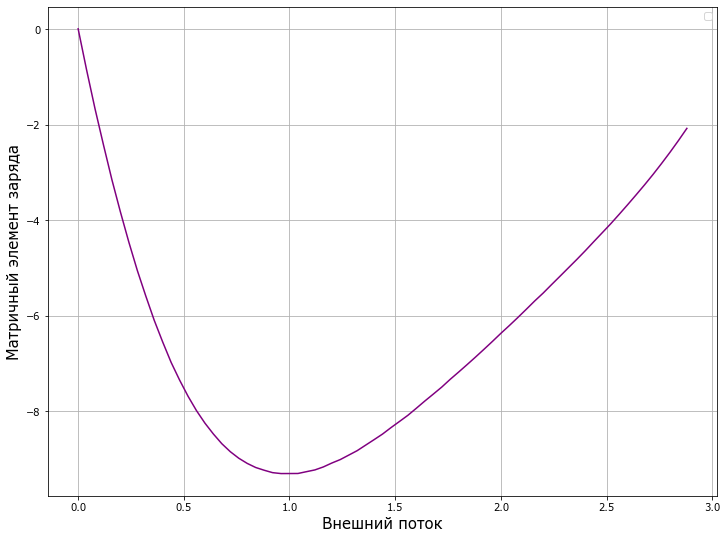

In [93]:
Graph("20-10_m11.txt")